In [6]:
class WeightedGraph:
    def __init__(self):
        self.graph = {}
        self.edge_count = 0

    def add_vertex(self, vertex):
        if vertex not in self.graph:
            self.graph[vertex] = []

    def add_edge(self, vertex1, vertex2, weight):
        if vertex1 in self.graph and vertex2 in self.graph:
            self.graph[vertex1].append((vertex2, weight))
            self.graph[vertex2].append((vertex1, weight))
            self.edge_count += 1

    def get_edges_in_decreasing_order(self):
        edges = []
        for vertex, neighbors in self.graph.items():
            for neighbor, weight in neighbors:
                edges.append((vertex, neighbor, weight))
        edges.sort(key=lambda edge: edge[2], reverse=True)
        return edges

    def remove_edge(self, vertex1, vertex2):
        if vertex1 in self.graph and vertex2 in self.graph:
            self.graph[vertex1] = [(v, w) for v, w in self.graph[vertex1] if v != vertex2]
            self.graph[vertex2] = [(v, w) for v, w in self.graph[vertex2] if v != vertex1]

    def dfs(self, start_vertex):
        visited = set()
        stack = [start_vertex]
        result = []

        while stack:
            vertex = stack.pop()
            if vertex not in visited:
                visited.add(vertex)
                result.append(vertex)
                stack.extend(neighbor for neighbor, _ in self.graph[vertex] if neighbor not in visited)

        return result

    def display_graph(self):
        for vertex, neighbors in self.graph.items():
            print(f"Vertex {vertex}: {neighbors}")

if __name__ == "__main__":
    g = WeightedGraph()

    g.add_vertex("A")
    g.add_vertex("B")
    g.add_vertex("C")
    g.add_vertex("D")

    g.add_edge("A", "B", 10)
    g.add_edge("A", "C", 6)
    g.add_edge("A", "D", 5)
    g.add_edge("C", "D", 4)
    g.add_edge("B", "D", 15)

  
    dec_edge=g.get_edges_in_decreasing_order()
    print("The original Graph: ",g.graph)
    for _ in range(g.edge_count):
        edge=dec_edge[0]
        (X,Y,Z)=edge
        original=len(g.dfs("A"))
        g.remove_edge(X,Y)
        new=len(g.dfs("A"))
        if original!=new:
            g.add_edge(X,Y,Z)
        dec_edge.pop(0)
        dec_edge.pop(0)
    
    print("The MST           : ",g.graph)

The original Graph:  {'A': [('B', 10), ('C', 6), ('D', 5)], 'B': [('A', 10), ('D', 15)], 'C': [('A', 6), ('D', 4)], 'D': [('A', 5), ('C', 4), ('B', 15)]}
The MST           :  {'A': [('B', 10), ('D', 5)], 'B': [('A', 10)], 'C': [('D', 4)], 'D': [('A', 5), ('C', 4)]}


In [7]:
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v):
        if u in self.graph:
            self.graph[u].append(v)
        else:
            self.graph[u] = [v]

    def dfs(self, v, visited, stack):
        visited.add(v)
        for i in self.graph.get(v, []):
            if i not in visited:
                self.dfs(i, visited, stack)
        stack.append(v)

    def transpose(self):
        g = Graph()
        for u in self.graph:
            for v in self.graph[u]:
                g.add_edge(v, u) 
        return g

    def kosaraju(self):
        stack = []
        visited = set()

        for u in self.graph:
            if u not in visited:
                self.dfs(u, visited, stack)

        gt = self.transpose()

        visited = set()
        sccs = []

        while stack:
            u = stack.pop()
            if u not in visited:
                scc = []
                gt.dfs(u, visited, scc)
                sccs.append(scc)

        return sccs
    
    def print_transpose(self):
        for u in self.graph:
            for v in self.graph[u]:
                print(f"{v} -> {u}")

    def print_edges(self):
        for u in self.graph:
            for v in self.graph[u]:
                print(f"{u} -> {v}")

g = Graph()
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(1, 4)
g.add_edge(4, 5)
g.add_edge(5, 6)
g.add_edge(6, 4)
g.add_edge(4, 7)
g.add_edge(7, 8)
g.add_edge(8, 9)
g.add_edge(9, 10)
g.add_edge(10, 7)

print("\nEdges:")
g.print_edges()


sccs = g.kosaraju()
print()
print("Strongly Connected Components:")
for i, scc in enumerate(sccs):
    print(f"SCC {i + 1}: {scc}")



print("\nTranspose Graph:")
g.print_transpose()


Edges:
1 -> 2
1 -> 4
2 -> 3
4 -> 5
4 -> 7
5 -> 6
6 -> 4
7 -> 8
8 -> 9
9 -> 10
10 -> 7

Strongly Connected Components:
SCC 1: [1]
SCC 2: [5, 6, 4]
SCC 3: [8, 9, 10, 7]
SCC 4: [2]
SCC 5: [3]

Transpose Graph:
2 -> 1
4 -> 1
3 -> 2
5 -> 4
7 -> 4
6 -> 5
4 -> 6
8 -> 7
9 -> 8
10 -> 9
7 -> 10


In [ ]:
#include <bits/stdc++.h>
using namespace std;

const int MAX_NODES = 100001;

int u[MAX_NODES];         // Array to store u values
int v[MAX_NODES];         // Array to store v values
int val[MAX_NODES];       // Array to store values
int n, m, k;              // Number of nodes, number of edges, and threshold
vector<int> adj[MAX_NODES];  // Adjacency list for the graph
stack<int> dfsStack;      // Stack for DFS traversal
bool visited[MAX_NODES];  // Array to keep track of visited nodes
int componentSize[MAX_NODES]; // Array to store component sizes
int componentCount = 0;   // Counter for connected components

// Depth-First Search (DFS) for traversal
void dfs(int node) {
    visited[node] = true;
    for (int neighbor : adj[node]) {
        if (!visited[neighbor]) {
            dfs(neighbor);
        }
    }
    dfsStack.push(node);
}

// Second DFS for counting component sizes
void dfs2(int node) {
    componentSize[componentCount]++;
    visited[node] = true;
    for (int neighbor : adj[node]) {
        if (!visited[neighbor]) {
            dfs2(neighbor);
        }
    }
}

// Function to check if there's a component with size at least k
bool check(int limit) {
    componentCount = 0;
    memset(visited, false, sizeof(visited));
    for (int i = 1; i <= n; i++) {
        adj[i].clear(); // Clear the adjacency list
    }
    for (int i = 1; i <= m; i++) {
        if (val[u[i]] >= limit && val[v[i]] >= limit) {
            adj[u[i]].push_back(v[i]); // Add edges to the graph
        }
    }
    for (int i = 1; i <= n; i++) {
        if (!visited[i]) {
            dfs(i);
        }
    }
    memset(visited, false, sizeof(visited));
    while (!dfsStack.empty()) {
        int cur = dfsStack.top();
        dfsStack.pop();
        if (!visited[cur]) {
            dfs2(cur);
            componentCount++;
        }
    }
    int largestComponentSize = *max_element(componentSize + 1, componentSize + componentCount + 1);
    fill(componentSize + 1, componentSize + componentCount + 1, 0); // Reset component sizes
    return largestComponentSize >= k;
}

int main() {
    cin >> n >> m >> k; // Input the number of nodes, edges, and threshold
    for (int i = 1; i <= n; i++) cin >> val[i]; // Input values for each node
    for (int i = 1; i <= m; i++) cin >> u[i] >> v[i]; // Input edges

    int left = 1, right = 1e9; // Binary search range
    int answer = -1; // Initialize the answer
    while (left <= right) {
        int mid = (left + right) / 2;
        if (check(mid)) {
            answer = mid;
            left = mid + 1;
        } else {
            right = mid - 1;
        }
    }
    cout << answer << endl; // Output the answer
    return 0;
}

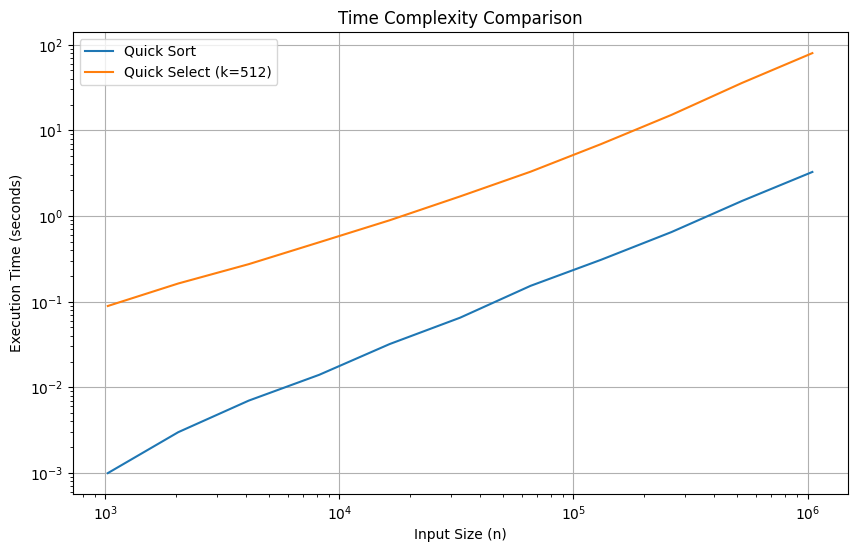

In [1]:

import random
import time
import matplotlib.pyplot as plt

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[random.randint(0, len(arr) - 1)]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def quick_select(arr, k):
    if len(arr) == 1:
        return arr[0]

    pivot = arr[random.randint(0, len(arr) - 1)]
    left = [x for x in arr if x < pivot]
    right = [x for x in arr if x > pivot]
    pivot_count = len(arr) - len(left) - len(right)

    if k < len(left):
        return quick_select(left, k)
    elif k < len(left) + pivot_count:
        return pivot
    else:
        return quick_select(right, k - len(left) - pivot_count)

# Measure execution time for different input sizes
input_sizes = [2**i for i in range(10, 21)]  # Input sizes from 2^10 to 2^20
quick_sort_times = []
quick_select_times = []

for n in input_sizes:
    arr = [random.randint(1, 1000000) for _ in range(n)]
    a = arr.copy()

    # Measure Quick Sort time
    start_time = time.time()
    quick_sort(arr)
    end_time = time.time()
    quick_sort_times.append(end_time - start_time)

    # Measure Quick Select time for k = 512
    k = 512
    start_time = time.time()
    for _ in range(k):
        quick_select(a, k)
    end_time = time.time()
    quick_select_times.append(end_time - start_time)

# Plot the time complexities
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, quick_sort_times, label='Quick Sort')
plt.plot(input_sizes, quick_select_times, label='Quick Select (k=512)')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Complexity Comparison')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.show()
